# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [2]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
#Dimensão data frame
athletes.shape

(11538, 11)

In [7]:
#Informaççoes sobre os dados
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [8]:
#Summary
athletes.describe().drop(['id'], axis=1)

,height,weight,gold,silver,bronze
count,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,1.766282,72.068205,0.057722,0.056769,0.061016
std,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.210000,31.000000,0.000000,0.000000,0.000000
25%,1.690000,60.000000,0.000000,0.000000,0.000000
50%,1.760000,70.000000,0.000000,0.000000,0.000000
75%,1.840000,81.000000,0.000000,0.000000,0.000000
max,2.210000,170.000000,5.000000,2.000000,2.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [9]:
# Gerando a amostra
sample = get_sample(athletes,'height',n=3000)

In [10]:
#Teste de normalidade (altura)
norm_shapiro_wilk = sct.shapiro(sample)
print(norm_shapiro_wilk)

(0.9961519837379456, 5.681722541339695e-07)


In [11]:
def q1():
    alpha = 0.05
    return norm_shapiro_wilk[1] > alpha
q1()

False

# Conclusão

### Hipotéses:
* **H0**: Segue distribuição normal

* **H1**: Não segue distribuição normal

#### Como p-valor menor que o nível de significância, rejeita-se h0. Ou seja, temos razões estatísticas para afirmar que a altura não segue uma distribuição normal.

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

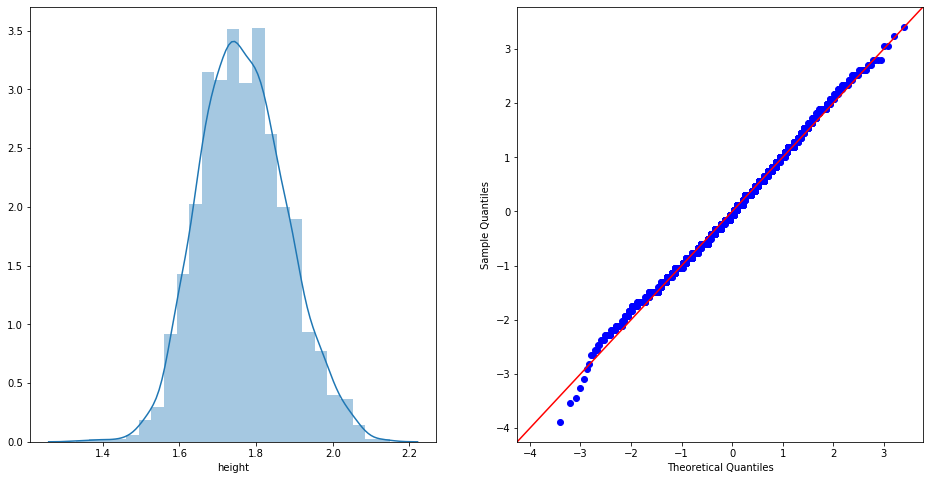

In [12]:
import statsmodels.api as sm
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Histograma
sns.distplot(sample, bins=25, ax=axs[0]);

# QQ-plot
sm.qqplot(sample, fit=True, line="45", ax=axs[1]);

Levando em consideração os gráficos aima, observa - se que os dados seguem distribuição normal, contradizendo o teste de Shapiro-Wilk


## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
norm_jarque_bera = sct.jarque_bera(sample)
norm_jarque_bera

(13.03363513594265, 0.001478366424594868)

In [14]:
def q2():
    alpha = 0.05
    return norm_jarque_bera[1] > alpha
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

Sim, pois em ambos os testes temos que os dados não seguem uma dist.normal

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [15]:
#gerando nova amostra com os mesmos dados da primeira
sample2 = get_sample(athletes,'weight',n=3000)

In [16]:
#Teste de normalidade (peso)
norm_shapiro_wilk = sct.shapiro(sample2)
print(norm_shapiro_wilk)

(0.9475960731506348, 1.9370674007129718e-31)


In [17]:
def q3():
    alpha = 0.05
    return norm_shapiro_wilk[1] > alpha
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

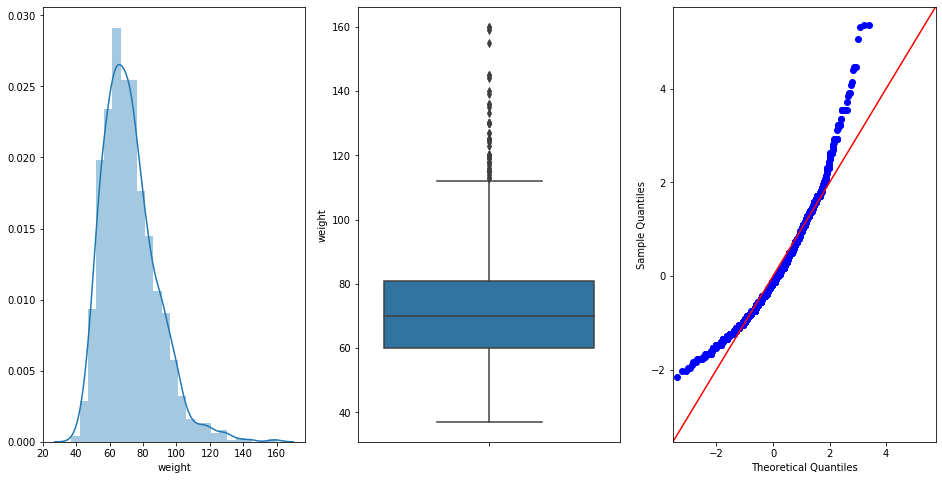

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(16,8))

# Histograma:
sns.distplot(sample2, bins=25, ax=axs[0])

# Box plot:
sns.boxplot(sample2,orient='v', ax=axs[1])

# QQ-plot:
sm.qqplot(sample2, fit=True, line="45", ax=axs[2]);

Com o resultado do teste e através da análise dos gráficos, temos que os dados não srguem uma distribuição normal.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [19]:
# Transformação da base
sample2 = get_sample(athletes,'weight',n=3000)
sample_log = np.log(sample2)

In [20]:
# Teste de normalidade
norm_dagostino_pearson = sct.normaltest(sample_log)
norm_dagostino_pearson

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

In [21]:
def q4():
    alpha = 0.05
    return norm_dagostino_pearson[1] > alpha
    
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

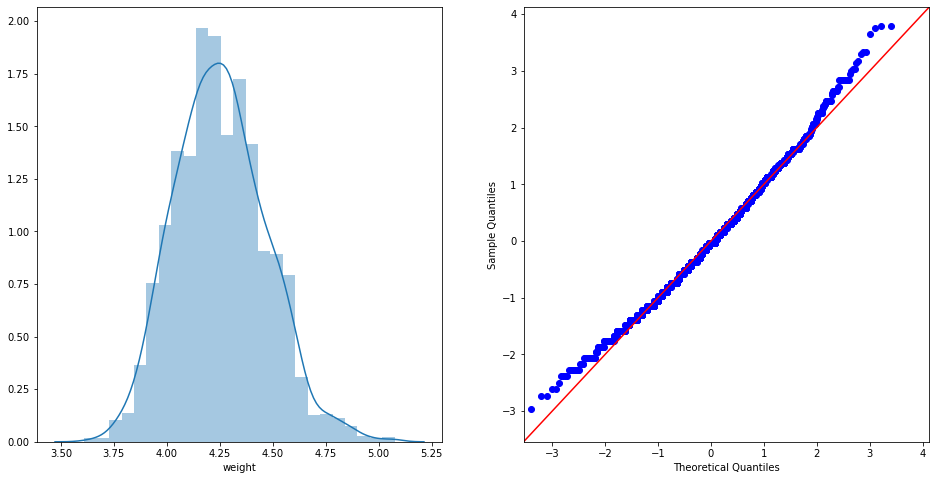

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Histograma:
sns.distplot(sample_log, bins=25, ax=axs[0]);

# QQ-plot:
sm.qqplot(sample_log, fit=True, line="45", ax=axs[1]);

Observa-se que após a transformação, os dados tendem a querer seguir uma distribuição normal, porém ainda não seguem.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [23]:
# Selecionando os data frame como solicitado
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']

In [24]:
print('Altura média USA = ',usa.height.mean())
print('Altura média Brasil = ',bra.height.mean())

Altura média USA =  1.7877678571428557
Altura média Brasil =  1.764033613445379


In [25]:
# t-test

bra_usa = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')
bra_usa

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)

In [26]:
def q5():
    alpha = 0.05
    return bra_usa[1] > alpha
q5()

False

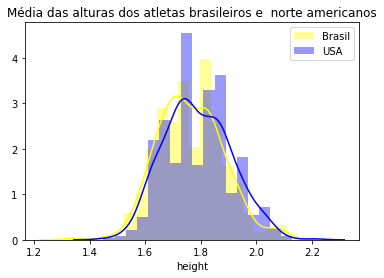

In [27]:
#Histograma

sns.distplot(bra.height.dropna(), label='Brasil', color='yellow')
sns.distplot(usa.height.dropna(), label='USA', color ='blue')
plt.title('Média das alturas dos atletas brasileiros e  norte americanos')
plt.legend();

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [28]:
print('Altura média Canadá = ',can.height.mean())
print('Altura média Brasil = ',bra.height.mean())

Altura média Canadá =  1.7585937500000004
Altura média Brasil =  1.764033613445379


In [29]:
# t-test

bra_can = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')
bra_can

Ttest_indResult(statistic=0.6389304914365109, pvalue=0.5230827295440921)

In [30]:
def q6():
    alpha = 0.05
    return bra_can[1] > alpha
q6()

True

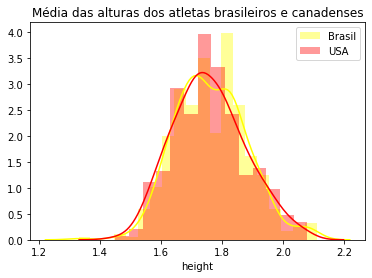

In [31]:
#Histograma

sns.distplot(bra.height.dropna(), label='Brasil', color='yellow')
sns.distplot(can.height.dropna(), label='USA', color ='red')
plt.title('Média das alturas dos atletas brasileiros e canadenses')
plt.legend();

Pelos resultados, pode-se dizer que as alturas do BRasil e Canadá são igualmente distribuídas.

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [32]:
print('Altura média Canadá = ',can.height.mean())
print('Altura média USA = ',usa.height.mean())

Altura média Canadá =  1.7585937500000004
Altura média USA =  1.7877678571428557


In [33]:
# t-test

usa_can = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')
usa_can

Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347389851)

In [35]:
def q7():
    alpha = 0.05
    return round(usa_can[1],8)
q7()

0.00046601

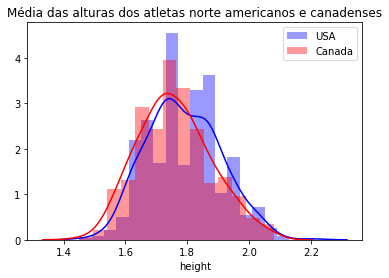

In [36]:
# Histograma

sns.distplot(usa.height.dropna(), label='USA', color='blue')
sns.distplot(can.height.dropna(), label='Canada', color ='red')
plt.title('Média das alturas dos atletas norte americanos e canadenses')
plt.legend();

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [37]:
# Comparação entre os três


print('Altura média Brasil = ',bra.height.mean())
print('Altura média Canadá = ',can.height.mean())
print('Altura média USA = ',usa.height.mean())

Altura média Brasil =  1.764033613445379
Altura média Canadá =  1.7585937500000004
Altura média USA =  1.7877678571428557


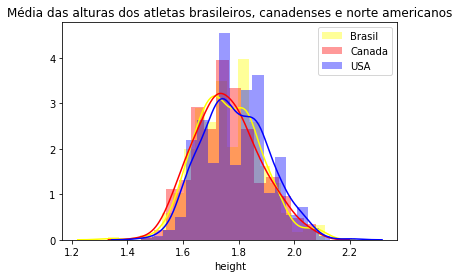

In [38]:
sns.distplot(bra.height.dropna(), label='Brasil', color='yellow')
sns.distplot(can.height.dropna(), label='Canada', color ='red')
sns.distplot(usa.height.dropna(), label='USA', color ='blue')
plt.title('Média das alturas dos atletas brasileiros, canadenses e norte americanos')
plt.legend();